## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [36]:
import numpy as np
import pandas as pd

In [37]:
# 1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
df = pd.read_csv('./data/airbnb_hw.csv')
print(df.shape, '\n')
df.head()

(30478, 13) 



,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [21]:
X = df.loc[:,['Price','Beds','Number Of Reviews','Review Scores Rating']]

In [22]:
price = X['Price']
price.unique() # there are commas when the price is 1000 or above
price.str.replace(',','')
price = pd.to_numeric(X['Price'],errors='coerce')

In [23]:
beds = X['Beds']
beds.unique() # Nan shows up
beds = beds.fillna(1)

In [24]:
reviews = X['Number Of Reviews']
reviews.unique()
reviews = pd.to_numeric(X['Number Of Reviews'],errors='coerce')

In [25]:
scores = X['Review Scores Rating']
scores.unique()

array([ nan,  96., 100.,  94.,  90.,  98.,  93.,  91.,  97.,  95.,  99.,
        85.,  86.,  80.,  88.,  92.,  89.,  82.,  87.,  81.,  76.,  78.,
        83.,  66.,  84.,  72.,  79.,  60.,  40.,  62.,  74.,  77.,  50.,
        71.,  75.,  73.,  69.,  65.,  68.,  70.,  67.,  64.,  20.,  57.,
        58.,  43.,  63.,  55.,  47.,  53.,  49.,  30.])

In [26]:
X = X.dropna()

In [27]:
# 2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

In [28]:
X1 = X.drop('Price', axis=1)
X1.apply(maxmin)

,Beds,Number Of Reviews,Review Scores Rating
4,0.1875,0.148438,0.950
5,0.0625,0.011719,1.000
6,0.0625,0.031250,1.000
7,0.0625,0.308594,0.925
8,0.1250,0.367188,0.875
...,...,...,...
30332,0.0625,0.000000,1.000
30347,0.0625,0.000000,0.750
30378,0.0625,0.000000,1.000
30404,0.0625,0.000000,1.000


In [29]:
# 3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

model = KMeans(n_clusters=6, max_iter=300, n_init=10, random_state=0)
model = model.fit(X1)
X1['cluster'] = model.labels_

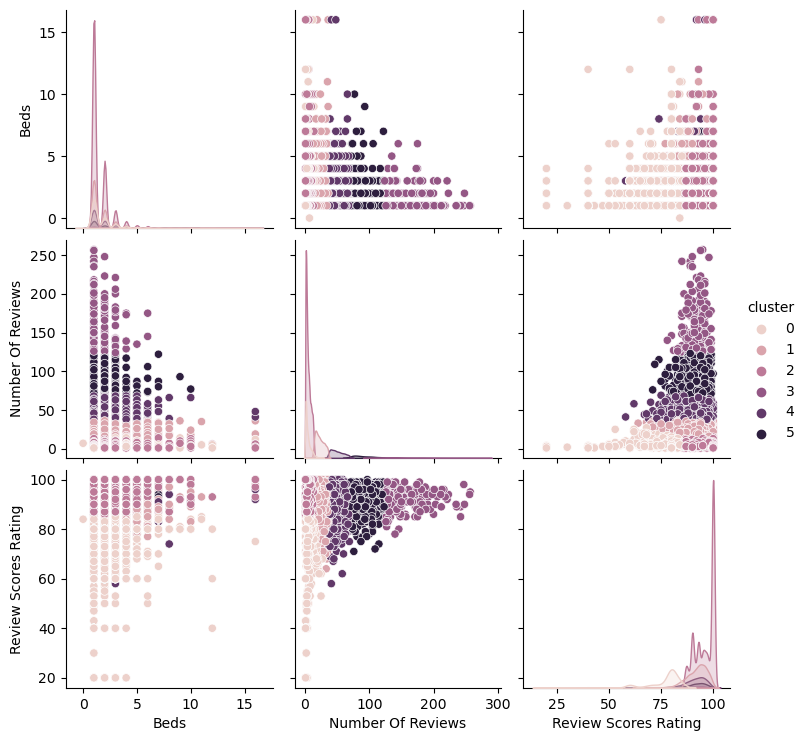

In [30]:
# 4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
import seaborn as sns
sns.pairplot(data=X1,hue='cluster')


In [31]:
# 5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
X['cluster'] = model.labels_
X.loc[:,['Price', 'cluster']].groupby('cluster').describe()

Price                 
         count unique  top freq
cluster                        
0         2913    253  150  129
1         4232    333  150  167
2        12064    393  150  615
3          181     71   99    9
4         1945    225  150   80
5          776    165   99   30

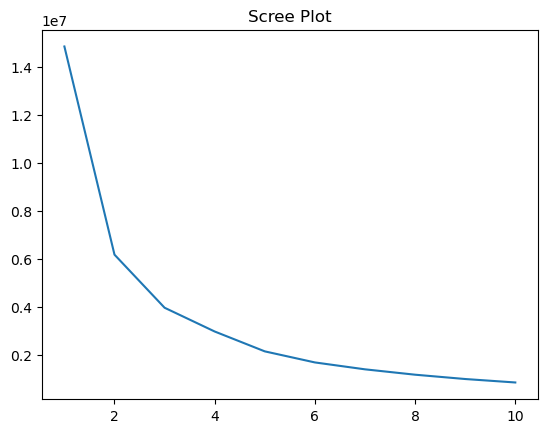

In [32]:
# 6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.
k_bar = 10
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X1)
    SSE[k] = model.inertia_
    
scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

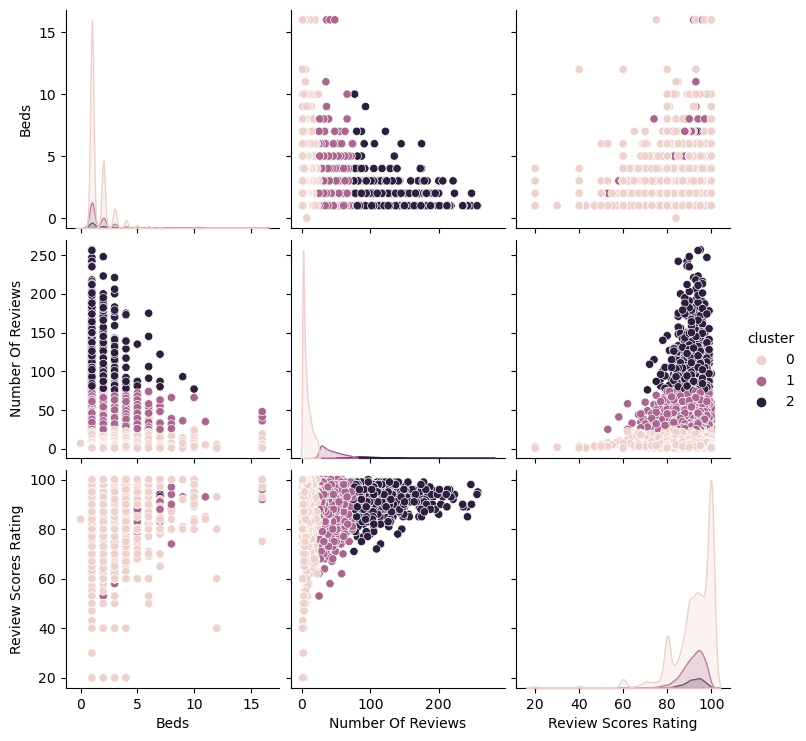

In [33]:
model1 = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0)
model1 = model1.fit(X1)
X1['cluster'] = model1.labels_

sns.pairplot(data=X1,hue='cluster')

In [34]:
X['cluster'] = model1.labels_
X.loc[:,['Price', 'cluster']].groupby('cluster').describe()

Price                 
         count unique  top freq
cluster                        
0        17573    439  150  850
1         3694    303  150  144
2          844    162   99   37

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [35]:
# 1
def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

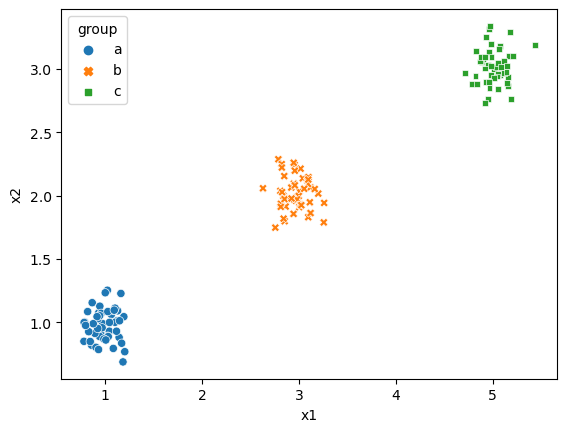

In [38]:
# 2. Make scatterplots of the (X1,X2) points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

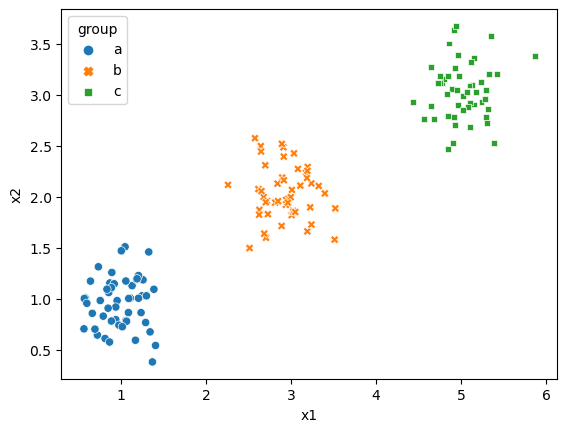

In [39]:
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

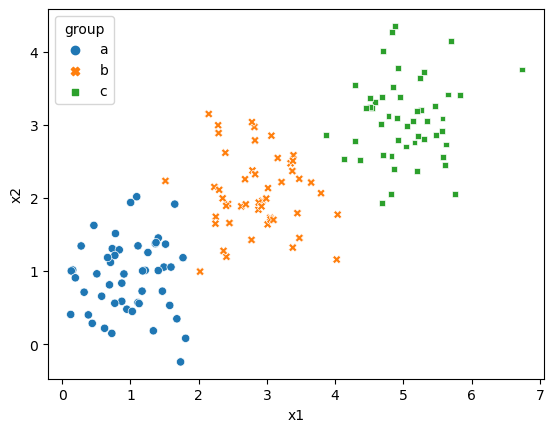

In [40]:
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

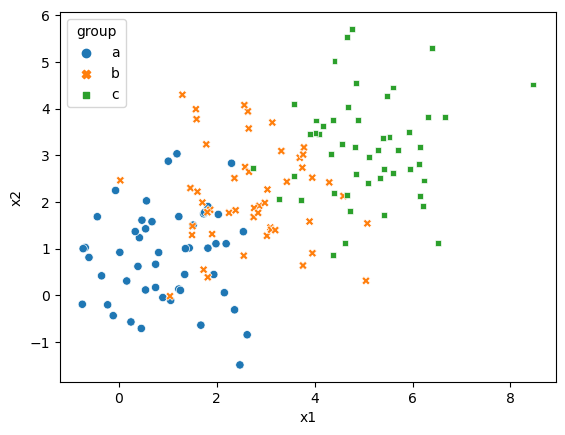

In [41]:
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

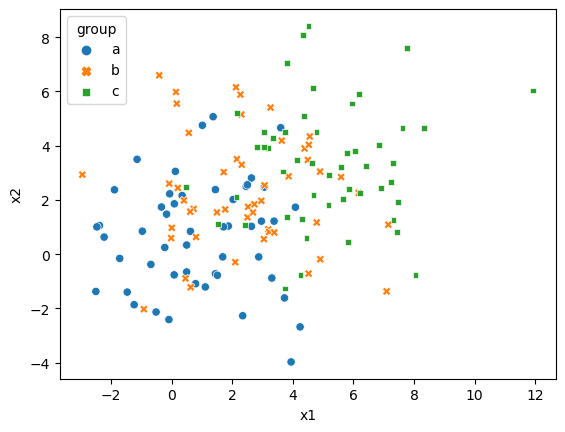

In [42]:
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

> As the noise increases, the clusters become less and less distinct as they mix together. We see separate, dense clusters when the noise is 0.125 as opposed to the mixed clusters when the noise is 2.

Text(0.5, 1.0, 'Scree Plot')

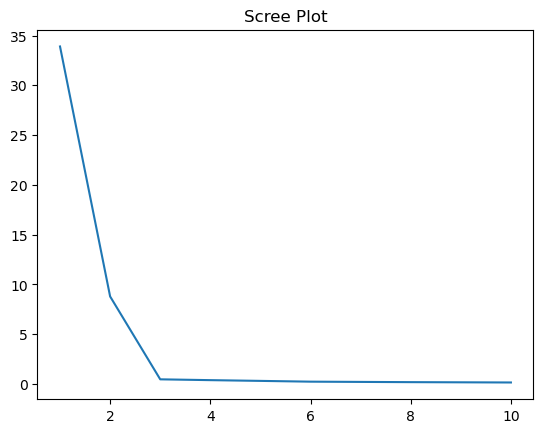

In [52]:
# 3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
def make_scree(df):
    X = df.loc[ : , ['x1','x2'] ] 
    X = X.apply(maxmin)

    k_bar = 10
    k_grid = np.arange(1,k_bar+1)
    SSE = np.zeros(k_bar)
    for k in range(k_bar): 
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) 
        model = model.fit(X) 
        SSE[k] = model.inertia_ 

    return sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

make_scree(df0_125)

Text(0.5, 1.0, 'Scree Plot')

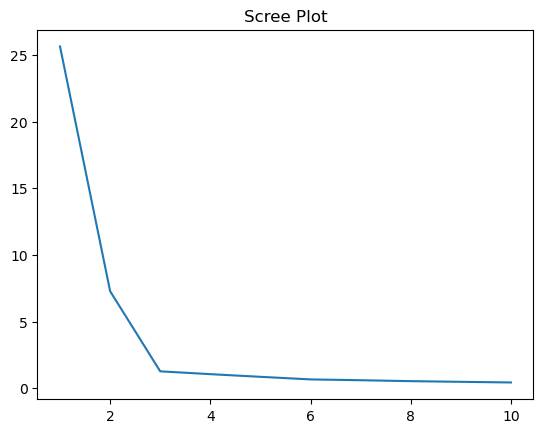

In [53]:
make_scree(df0_25)

Text(0.5, 1.0, 'Scree Plot')

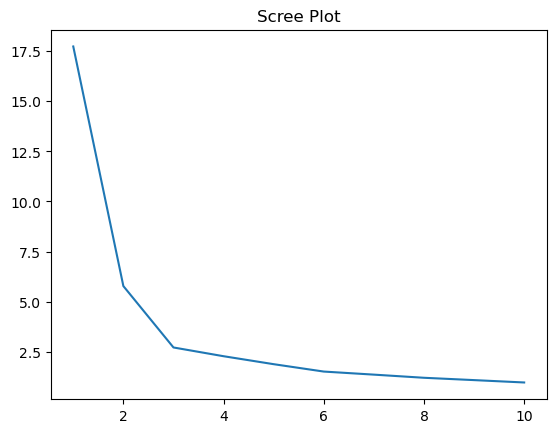

In [54]:
make_scree(df0_5)

Text(0.5, 1.0, 'Scree Plot')

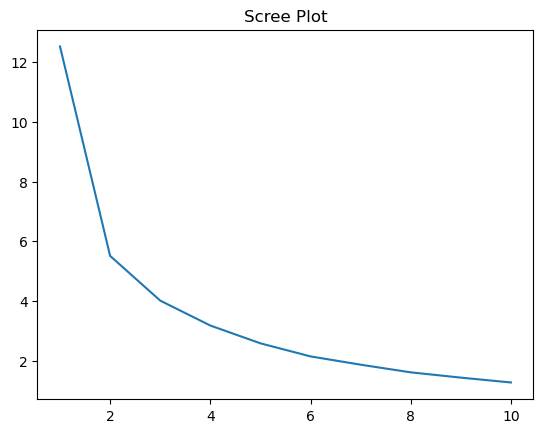

In [55]:
make_scree(df1_0)

Text(0.5, 1.0, 'Scree Plot')

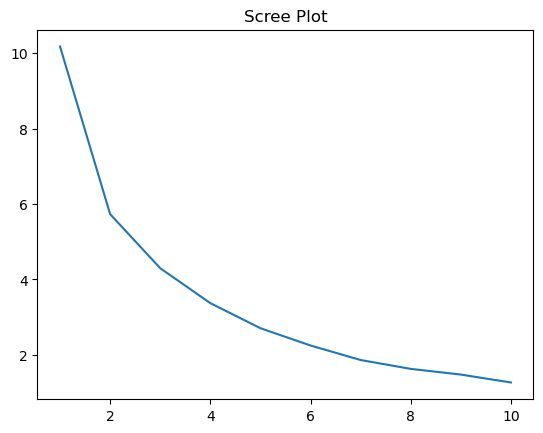

In [56]:
make_scree(df2_0)

> For the 0.125, 0.25, and 0.5 scree plots, there is an obvious elbow at k=3. For the 1 scree plot, there is a possible elbow at k=2. For the scree plot with a noise of 2, there is not an obvious elbow.

4. Explain the intuition of the elbow, using this numerical simulation as an example.
> The elbow represents the place in the graph where the decrease in SSE from k-1 to k is very high compared to k to k+1. Looking at the graphs for the datasets with noise less than or equal to 0.5, we see that there are 3 visually distinct clusters. The scree plot showcases these clusters through the elbow, as a k value of 3 best groups the data points together. As the noise increases, the clusters become a lot less distinct, so it would be harder to pinpoint an good number of clusters to classify the data. This notion is reflected in the scree plots, as the graph represents a more curved line without an obvious elbow.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?